In [1]:
import os
import mglearn
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print('훈련 세트 정확도 : {:.3f}'.format(tree.score(x_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(x_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


In [3]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(x_train, y_train)
print('훈련 세트 정확도 : {:.3f}'.format(tree.score(x_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(x_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


In [4]:
export_graphviz(tree, out_file='tree.dot', class_names=['malignant','benign'],
                feature_names=cancer.feature_names, impurity=False, filled=True)

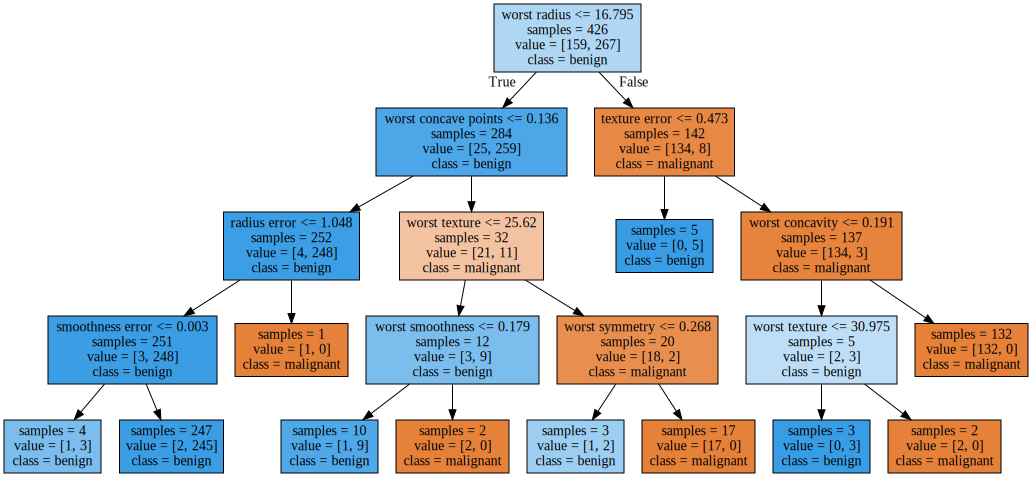

In [5]:
with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [6]:
# 깊이가 깊어지면 전체 트리를 살펴보는 것은 어려울 수 있다.
# 그렇기 때문에 트리가 어떻게 작도하는지 요약하는 속성들을 사용할 수 있다.
# 가장 널리 사용되는 속성은 각 특성이 얼마나 중요한지 평하는 특성 중ㅁ요도이다.
print('특성 중요도 : \n{}'.format(tree.feature_importances_))

특성 중요도 : 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


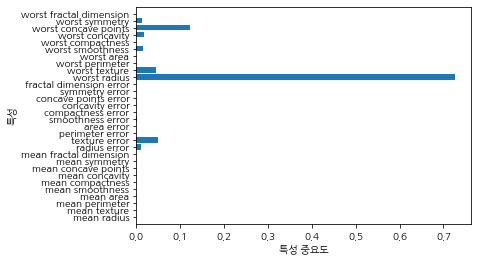

In [7]:
# 그래프로 특성 중요도를 살펴 본 결과 worst radius가 가장 중요한 특성으로 나타났다.
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

In [8]:
# 컴퓨터 메모리 가격 동향
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

Text(0, 0.5, '가격 ($/Mbyte_)')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


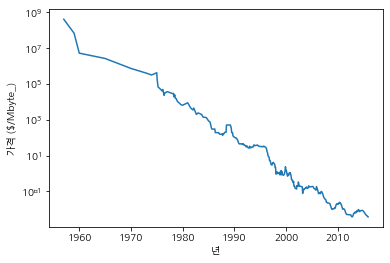

In [9]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격 ($/Mbyte_)')

In [10]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

x_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

In [11]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train)

In [12]:
x_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)

In [13]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


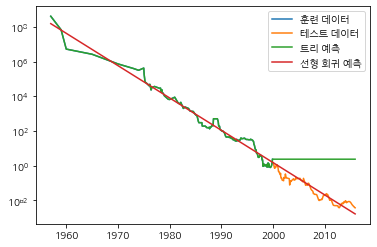

In [14]:
# 트리 모델은 훈련 데이터를 완벽하게 예측한다.
# 하지만 트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없다.
plt.semilogy(data_train.date, data_train.price, label='훈련 데이터')
plt.semilogy(data_test.date, data_test.price, label='테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label='트리 예측')
plt.semilogy(ram_prices.date, price_lr, label='선형 회귀 예측')
plt.legend()